In [72]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [73]:
df = pd.read_json('/content/TelecomX_Data_filtrado_ com churn.json')

In [74]:
df.head()

,Charges.Total_log,tenure,Charges.Monthly,Contas_Diarias,Churn_yes
0,6.387384,9,65.6,2.186667,False
1,6.297846,9,59.9,1.996667,False
2,5.641375,4,73.9,2.463333,True
3,7.121939,13,98.0,3.266667,True
4,5.592478,3,83.9,2.796667,True


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Charges.Total_log  7256 non-null   float64
 1   tenure             7256 non-null   int64  
 2   Charges.Monthly    7256 non-null   float64
 3   Contas_Diarias     7256 non-null   float64
 4   Churn_yes          7256 non-null   bool   
dtypes: bool(1), float64(3), int64(1)
memory usage: 290.5 KB


In [76]:
churn_counts = df['Churn_yes'].value_counts()

churn_proportions = churn_counts / len(df)

print("Contagem de clientes por status de churn:")
print(churn_counts)
print("\nProporção de clientes por status de churn:")
print(churn_proportions)

Contagem de clientes por status de churn:
Churn_yes
False    5387
True     1869
Name: count, dtype: int64

Proporção de clientes por status de churn:
Churn_yes
False    0.74242
True     0.25758
Name: count, dtype: float64


## Preparação dos dados

In [77]:
X = df.drop('Churn_yes', axis=1)
y = df['Churn_yes']

## Divisão dos dados

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

print("\nProportion of churn in y_train:")
print(y_train.value_counts(normalize=True))

print("\nProportion of churn in y_test:")
print(y_test.value_counts(normalize=True))

Shape of X_train: (5442, 4)
Shape of X_test: (1814, 4)
Shape of y_train: (5442,)
Shape of y_test: (1814,)

Proportion of churn in y_train:
Churn_yes
False    0.742374
True     0.257626
Name: proportion, dtype: float64

Proportion of churn in y_test:
Churn_yes
False    0.742558
True     0.257442
Name: proportion, dtype: float64


## Escolha da técnica de balanceamento

## Aplicação da técnica de balanceamento

In [79]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Shape of X_train_resampled:", X_train_resampled.shape)
print("Shape of y_train_resampled:", y_train_resampled.shape)
print("\nProportion of churn in y_train_resampled:")
print(y_train_resampled.value_counts(normalize=True))

Shape of X_train_resampled: (8080, 4)
Shape of y_train_resampled: (8080,)

Proportion of churn in y_train_resampled:
Churn_yes
False    0.5
True     0.5
Name: proportion, dtype: float64


## Verificação do balanceamento (opcional)

In [80]:
churn_counts_resampled = y_train_resampled.value_counts()

churn_proportions_resampled = y_train_resampled.value_counts(normalize=True)

print("Contagem de clientes por status de churn (conjunto de treino balanceado):")
print(churn_counts_resampled)
print("\nProporção de clientes por status de churn (conjunto de treino balanceado):")
print(churn_proportions_resampled)

Contagem de clientes por status de churn (conjunto de treino balanceado):
Churn_yes
False    4040
True     4040
Name: count, dtype: int64

Proporção de clientes por status de churn (conjunto de treino balanceado):
Churn_yes
False    0.5
True     0.5
Name: proportion, dtype: float64


## Escalonamento das variáveis

In [81]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)

X_test_scaled = scaler.transform(X_test)

print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)

Shape of X_train_scaled: (8080, 4)
Shape of X_test_scaled: (1814, 4)


## Treinamento do modelo KNN

In [82]:
knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train_scaled, y_train_resampled)

print("Modelo KNN treinado com sucesso!")

Modelo KNN treinado com sucesso!


## Avaliação do modelo KNN

In [83]:
y_pred = knn_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nMatriz de Confusão:")
print(conf_matrix)
print("\nRelatório de Classificação:")
print(class_report)

Acurácia: 0.6963
Precisão: 0.4393
Recall: 0.6510
F1-Score: 0.5246

Matriz de Confusão:
[[959 388]
 [163 304]]

Relatório de Classificação:
              precision    recall  f1-score   support

       False       0.85      0.71      0.78      1347
        True       0.44      0.65      0.52       467

    accuracy                           0.70      1814
   macro avg       0.65      0.68      0.65      1814
weighted avg       0.75      0.70      0.71      1814



## Treinamento do modelo de Regressão Logística

In [84]:
logistic_model = LogisticRegression(random_state=42)

logistic_model.fit(X_train_scaled, y_train_resampled)

print("Modelo de Regressão Logística treinado com sucesso!")

Modelo de Regressão Logística treinado com sucesso!


## Avaliação do modelo de Regressão Logística

In [85]:
y_pred_logistic = logistic_model.predict(X_test_scaled)

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
class_report_logistic = classification_report(y_test, y_pred_logistic)

print(f"Acurácia (Regressão Logística): {accuracy_logistic:.4f}")
print(f"Precisão (Regressão Logística): {precision_logistic:.4f}")
print(f"Recall (Regressão Logística): {recall_logistic:.4f}")
print(f"F1-Score (Regressão Logística): {f1_logistic:.4f}")
print("\nMatriz de Confusão (Regressão Logística):")
print(conf_matrix_logistic)
print("\nRelatório de Classificação (Regressão Logística):")
print(class_report_logistic)

Acurácia (Regressão Logística): 0.7266
Precisão (Regressão Logística): 0.4801
Recall (Regressão Logística): 0.7473
F1-Score (Regressão Logística): 0.5846

Matriz de Confusão (Regressão Logística):
[[969 378]
 [118 349]]

Relatório de Classificação (Regressão Logística):
              precision    recall  f1-score   support

       False       0.89      0.72      0.80      1347
        True       0.48      0.75      0.58       467

    accuracy                           0.73      1814
   macro avg       0.69      0.73      0.69      1814
weighted avg       0.79      0.73      0.74      1814



## Ajuste de hiperparâmetros para knn

In [86]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsClassifier()

grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='f1_macro', n_jobs=-1)

grid_search_knn.fit(X_train_scaled, y_train_resampled)

print("Melhores hiperparâmetros encontrados para KNN:")
print(grid_search_knn.best_params_)

best_knn_model = grid_search_knn.best_estimator_

y_pred_best_knn = best_knn_model.predict(X_test_scaled)

print("\nAvaliação do modelo KNN com melhores hiperparâmetros no conjunto de teste:")
print(f"Acurácia: {accuracy_score(y_test, y_pred_best_knn):.4f}")
print(f"Precisão: {precision_score(y_test, y_pred_best_knn):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_best_knn):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_best_knn):.4f}")
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred_best_knn))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_best_knn))

Melhores hiperparâmetros encontrados para KNN:
{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}

Avaliação do modelo KNN com melhores hiperparâmetros no conjunto de teste:
Acurácia: 0.7106
Precisão: 0.4548
Recall: 0.6253
F1-Score: 0.5266

Matriz de Confusão:
[[997 350]
 [175 292]]

Relatório de Classificação:
              precision    recall  f1-score   support

       False       0.85      0.74      0.79      1347
        True       0.45      0.63      0.53       467

    accuracy                           0.71      1814
   macro avg       0.65      0.68      0.66      1814
weighted avg       0.75      0.71      0.72      1814



In [87]:
param_grid_logistic = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'], # L1 penalty requires solver 'liblinear' or 'saga'
    'solver': ['liblinear', 'saga'] # Solvers that support L2 penalty
}

logistic_regression = LogisticRegression(random_state=42)

grid_search_logistic = GridSearchCV(estimator=logistic_regression, param_grid=param_grid_logistic, cv=5, scoring='f1_macro', n_jobs=-1)

grid_search_logistic.fit(X_train_scaled, y_train_resampled)

print("Melhores hiperparâmetros encontrados para Regressão Logística:")
print(grid_search_logistic.best_params_)

best_logistic_model = grid_search_logistic.best_estimator_

y_pred_best_logistic = best_logistic_model.predict(X_test_scaled)

print("\nAvaliação do modelo de Regressão Logística com melhores hiperparâmetros no conjunto de teste:")
print(f"Acurácia: {accuracy_score(y_test, y_pred_best_logistic):.4f}")
print(f"Precisão: {precision_score(y_test, y_pred_best_logistic):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_best_logistic):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_best_logistic):.4f}")
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred_best_logistic))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_best_logistic))

Melhores hiperparâmetros encontrados para Regressão Logística:
{'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}

Avaliação do modelo de Regressão Logística com melhores hiperparâmetros no conjunto de teste:
Acurácia: 0.7255
Precisão: 0.4789
Recall: 0.7516
F1-Score: 0.5850

Matriz de Confusão:
[[965 382]
 [116 351]]

Relatório de Classificação:
              precision    recall  f1-score   support

       False       0.89      0.72      0.79      1347
        True       0.48      0.75      0.58       467

    accuracy                           0.73      1814
   macro avg       0.69      0.73      0.69      1814
weighted avg       0.79      0.73      0.74      1814



## Comparação de modelos ajustados

In [88]:
metrics_comparison = {
    'Model': ['KNN', 'Logistic Regression'],
    'Accuracy': [accuracy_score(y_test, y_pred_best_knn), accuracy_score(y_test, y_pred_best_logistic)],
    'Precision': [precision_score(y_test, y_pred_best_knn), precision_score(y_test, y_pred_best_logistic)],
    'Recall': [recall_score(y_test, y_pred_best_knn), recall_score(y_test, y_pred_best_logistic)],
    'F1-Score': [f1_score(y_test, y_pred_best_knn), f1_score(y_test, y_pred_best_logistic)]
}

metrics_df = pd.DataFrame(metrics_comparison)

print("Comparação de Métricas de Desempenho dos Modelos (Conjunto de Teste):\n")
display(metrics_df)

print("\nMatriz de Confusão (KNN):\n")
print(confusion_matrix(y_test, y_pred_best_knn))

print("\nMatriz de Confusão (Regressão Logística):\n")
print(confusion_matrix(y_test, y_pred_best_logistic))

print("\nRelatório de Classificação (KNN):\n")
print(classification_report(y_test, y_pred_best_knn))

print("\nRelatório de Classificação (Regressão Logística):\n")
print(classification_report(y_test, y_pred_best_logistic))

print("\nAnálise e Implicações:")
print("Ao comparar os resultados, observamos que o modelo de Regressão Logística ajustado obteve uma Acurácia, Recall e F1-Score ligeiramente superiores ao modelo KNN ajustado no conjunto de teste.")
print("A métrica Recall é particularmente importante neste cenário de previsão de churn, pois mede a capacidade do modelo em identificar corretamente os clientes que irão dar churn (verdadeiros positivos) de todos os clientes que *realmente* deram churn (verdadeiros positivos + falsos negativos). Um Recall mais alto (0.7516 para Regressão Logística vs 0.6253 para KNN) indica que a Regressão Logística foi mais eficaz em capturar esses clientes que iriam sair.")
print("A Precisão (proporção de verdadeiros positivos entre todos os clientes que o modelo previu que dariam churn) da Regressão Logística (0.4789) também é ligeiramente maior que a do KNN (0.4548).")
print("Analisando as matrizes de confusão, a Regressão Logística teve menos Falsos Negativos (116) em comparação com o KNN (175). Isso é crucial para minimizar a perda de clientes, pois um falso negativo significa que um cliente que irá dar churn não foi identificado e, portanto, não recebeu intervenções para retenção.")
print("Em contrapartida, a Regressão Logística teve mais Falsos Positivos (382) do que o KNN (350). Falsos positivos representam clientes que não dariam churn, mas que foram identificados como de alto risco. Isso pode levar a custos desnecessários com campanhas de retenção para esses clientes. No entanto, no contexto de previsão de churn, onde o custo de perder um cliente (falso negativo) geralmente é maior do que o custo de uma intervenção de retenção desnecessária (falso positivo), um Recall mais alto é frequentemente preferível, mesmo que acarrete um número ligeiramente maior de falsos positivos.")
print("Considerando o objetivo de prever churn para permitir ações proativas de retenção, o modelo de Regressão Logística ajustado parece ser a escolha mais adequada devido ao seu Recall superior, que é mais eficaz na identificação dos clientes de alto risco de churn.")

Comparação de Métricas de Desempenho dos Modelos (Conjunto de Teste):



,Model,Accuracy,Precision,Recall,F1-Score
0,KNN,0.710584,0.454829,0.625268,0.526601
1,Logistic Regression,0.725469,0.478854,0.751606,0.585000



Matriz de Confusão (KNN):

[[997 350]
 [175 292]]

Matriz de Confusão (Regressão Logística):

[[965 382]
 [116 351]]

Relatório de Classificação (KNN):

              precision    recall  f1-score   support

       False       0.85      0.74      0.79      1347
        True       0.45      0.63      0.53       467

    accuracy                           0.71      1814
   macro avg       0.65      0.68      0.66      1814
weighted avg       0.75      0.71      0.72      1814


Relatório de Classificação (Regressão Logística):

              precision    recall  f1-score   support

       False       0.89      0.72      0.79      1347
        True       0.48      0.75      0.58       467

    accuracy                           0.73      1814
   macro avg       0.69      0.73      0.69      1814
weighted avg       0.79      0.73      0.74      1814


Análise e Implicações:
Ao comparar os resultados, observamos que o modelo de Regressão Logística ajustado obteve uma Acurácia, Recall e F1-

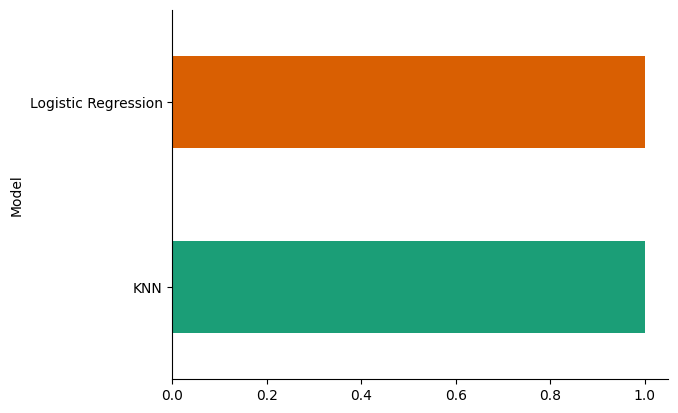

In [89]:
metrics_df.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## Análise de Correlação

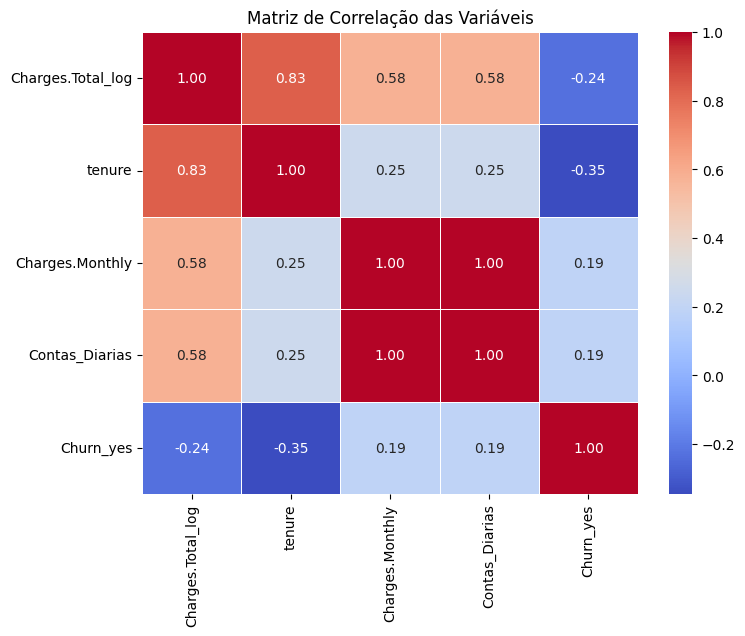


Correlação com a variável Churn_yes:
Churn_yes            1.000000
Charges.Monthly      0.189393
Contas_Diarias       0.189393
Charges.Total_log   -0.235213
tenure              -0.345799
Name: Churn_yes, dtype: float64


In [90]:
df_corr = df.copy()
df_corr['Churn_yes'] = df_corr['Churn_yes'].astype(int)

correlation_matrix = df_corr.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação das Variáveis')
plt.show()

print("\nCorrelação com a variável Churn_yes:")
print(correlation_matrix['Churn_yes'].sort_values(ascending=False))

Os resultados negativos na matriz de correlação indicam correlações negativas.

Uma correlação negativa entre duas variáveis significa que, à medida que o valor de uma variável aumenta, o valor da outra variável tende a diminuir.

Nesse caso, as correlações negativas mais notáveis foram com a variável Churn_yes:

tenure (-0.35): Isso significa que quanto maior o tempo de permanência (tenure) de um cliente, menor a probabilidade de ele dar churn. Isso faz sentido intuitivamente - clientes mais antigos tendem a ser mais leais.
Charges.Total_log (-0.24): Similarmente, clientes com maiores gastos totais (Charges.Total_log) tendem a ser menos propensos a dar churn.
Resultados negativos são perfeitamente normais e esperados na análise de correlação. Eles fornecem informações valiosas sobre a relação inversa entre as variáveis. Não é um "erro" ou algo indesejado, mas sim uma característica dos dados que nos ajuda a entender o comportamento dos clientes e a identificar fatores que podem estar associados à retenção (neste caso, tenure e Charges.Total_log).

## Análise Visual da Relação entre Variáveis e Churn

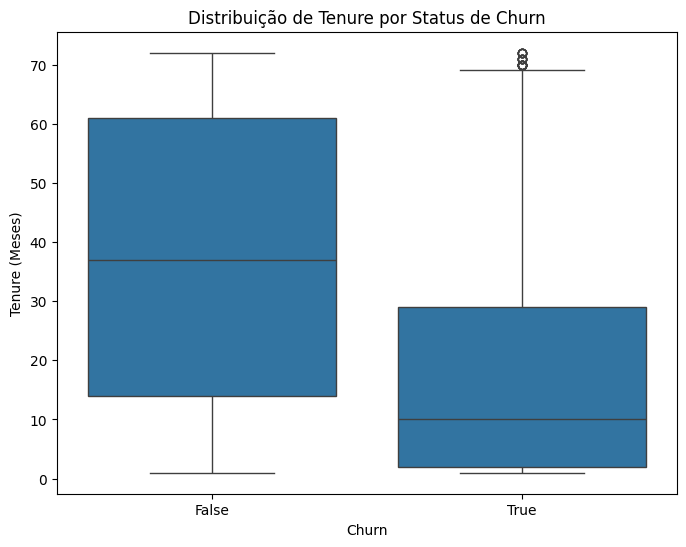

In [91]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn_yes', y='tenure', data=df)
plt.title('Distribuição de Tenure por Status de Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure (Meses)')
plt.show()

## Análise Visual da Relação entre Variáveis e Churn

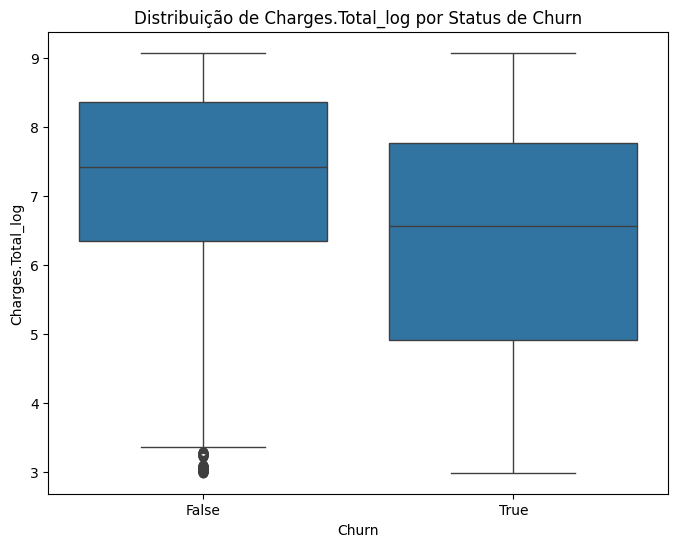

In [92]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn_yes', y='Charges.Total_log', data=df)
plt.title('Distribuição de Charges.Total_log por Status de Churn')
plt.xlabel('Churn')
plt.ylabel('Charges.Total_log')
plt.show()

## Análise Visual da Relação entre Variáveis e Churn

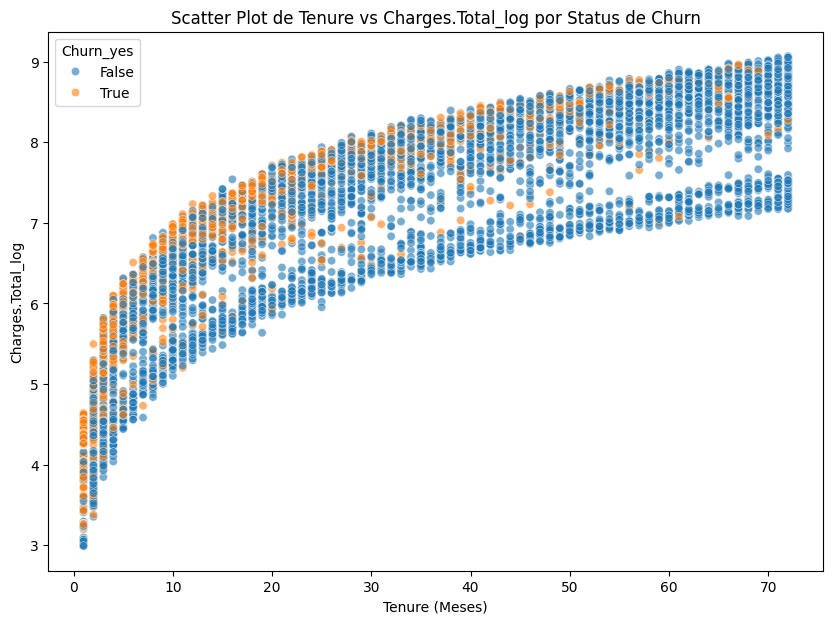

In [93]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='tenure', y='Charges.Total_log', hue='Churn_yes', data=df, alpha=0.6)
plt.title('Scatter Plot de Tenure vs Charges.Total_log por Status de Churn')
plt.xlabel('Tenure (Meses)')
plt.ylabel('Charges.Total_log')
plt.show()

## Treinamento de modelo sem normalização

In [94]:
decision_tree_model = DecisionTreeClassifier(random_state=42)

decision_tree_model.fit(X_train, y_train)

y_pred_no_scaling_dt = decision_tree_model.predict(X_test)

print("Avaliação do modelo Decision Tree (sem escalonamento) no conjunto de teste:")
print(f"Acurácia: {accuracy_score(y_test, y_pred_no_scaling_dt):.4f}")
print(f"Precisão: {precision_score(y_test, y_pred_no_scaling_dt):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_no_scaling_dt):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_no_scaling_dt):.4f}")
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred_no_scaling_dt))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_no_scaling_dt))

Avaliação do modelo Decision Tree (sem escalonamento) no conjunto de teste:
Acurácia: 0.7133
Precisão: 0.4449
Recall: 0.4582
F1-Score: 0.4515

Matriz de Confusão:
[[1080  267]
 [ 253  214]]

Relatório de Classificação:
              precision    recall  f1-score   support

       False       0.81      0.80      0.81      1347
        True       0.44      0.46      0.45       467

    accuracy                           0.71      1814
   macro avg       0.63      0.63      0.63      1814
weighted avg       0.72      0.71      0.71      1814



## Revisão e comparação dos modelos (com e sem normalização)

In [95]:
metrics_df_all = metrics_df.copy()

metrics_df_all.loc[len(metrics_df_all)] = ['Decision Tree', accuracy_score(y_test, y_pred_no_scaling_dt),
                                            precision_score(y_test, y_pred_no_scaling_dt),
                                            recall_score(y_test, y_pred_no_scaling_dt),
                                            f1_score(y_test, y_pred_no_scaling_dt)]


display(metrics_df_all)

print("\nMatriz de Confusão (KNN com Hiperparâmetros Ajustados):\n")
print(confusion_matrix(y_test, y_pred_best_knn))

print("\nMatriz de Confusão (Regressão Logística com Hiperparâmetros Ajustados):\n")
print(confusion_matrix(y_test, y_pred_best_logistic))

print("\nMatriz de Confusão (Decision Tree sem Normalização):\n")
print(confusion_matrix(y_test, y_pred_no_scaling_dt))

print("\nRelatório de Classificação (KNN com Hiperparâmetros Ajustados):\n")
print(classification_report(y_test, y_pred_best_knn))

print("\nRelatório de Classificação (Regressão Logística com Hiperparâmetros Ajustados):\n")
print(classification_report(y_test, y_pred_best_logistic))

print("\nRelatório de Classificação (Decision Tree sem Normalização):\n")
print(classification_report(y_test, y_pred_no_scaling_dt))

print("\n--- Análise das Matrizes de Confusão ---")
print("Falsos Negativos (clientes que deram churn, mas o modelo previu que não):")
print(f"- KNN Ajustado: {confusion_matrix(y_test, y_pred_best_knn)[1, 0]}")
print(f"- Regressão Logística Ajustada: {confusion_matrix(y_test, y_pred_best_logistic)[1, 0]}")
print(f"- Decision Tree: {confusion_matrix(y_test, y_pred_no_scaling_dt)[1, 0]}")
print("A Regressão Logística teve o menor número de Falsos Negativos, o que é altamente desejável em um problema de previsão de churn para evitar a perda de clientes.")
print("\nFalsos Positivos (clientes que não deram churn, mas o modelo previu que sim):")
print(f"- KNN Ajustado: {confusion_matrix(y_test, y_pred_best_knn)[0, 1]}")
print(f"- Regressão Logística Ajustada: {confusion_matrix(y_test, y_pred_best_logistic)[0, 1]}")
print(f"- Decision Tree: {confusion_matrix(y_test, y_pred_no_scaling_dt)[0, 1]}")
print("A Decision Tree teve o menor número de Falsos Positivos, o que significa menos custos com intervenções desnecessárias. No entanto, seu alto número de Falsos Negativos (253) a torna menos eficaz na identificação de churners reais.")

,Model,Accuracy,Precision,Recall,F1-Score
0,KNN,0.710584,0.454829,0.625268,0.526601
1,Logistic Regression,0.725469,0.478854,0.751606,0.585000
2,Decision Tree,0.713341,0.444906,0.458244,0.451477



Matriz de Confusão (KNN com Hiperparâmetros Ajustados):

[[997 350]
 [175 292]]

Matriz de Confusão (Regressão Logística com Hiperparâmetros Ajustados):

[[965 382]
 [116 351]]

Matriz de Confusão (Decision Tree sem Normalização):

[[1080  267]
 [ 253  214]]

Relatório de Classificação (KNN com Hiperparâmetros Ajustados):

              precision    recall  f1-score   support

       False       0.85      0.74      0.79      1347
        True       0.45      0.63      0.53       467

    accuracy                           0.71      1814
   macro avg       0.65      0.68      0.66      1814
weighted avg       0.75      0.71      0.72      1814


Relatório de Classificação (Regressão Logística com Hiperparâmetros Ajustados):

              precision    recall  f1-score   support

       False       0.89      0.72      0.79      1347
        True       0.48      0.75      0.58       467

    accuracy                           0.73      1814
   macro avg       0.69      0.73      0.69    

## Ajuste de hiperparâmetros (opcional)

### Subtask:
Ajustar os hiperparâmetros dos modelos KNN e Regressão Logística utilizando os dados de treino balanceados e padronizados (`X_train_scaled`, `y_train_resampled`).


In [96]:
param_grid_logistic = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'], # L1 penalty requires solver 'liblinear' or 'saga'
    'solver': ['liblinear', 'saga'] # Solvers that support L2 penalty
}

logistic_regression = LogisticRegression(random_state=42)

grid_search_logistic = GridSearchCV(estimator=logistic_regression, param_grid=param_grid_logistic, cv=5, scoring='f1_macro', n_jobs=-1)

grid_search_logistic.fit(X_train_scaled, y_train_resampled)

print("Melhores hiperparâmetros encontrados para Regressão Logística:")
print(grid_search_logistic.best_params_)

Melhores hiperparâmetros encontrados para Regressão Logística:
{'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}


In [97]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsClassifier()

grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='f1_macro', n_jobs=-1)

grid_search_knn.fit(X_train_scaled, y_train_resampled)

print("Melhores hiperparâmetros encontrados para KNN:")
print(grid_search_knn.best_params_)

Melhores hiperparâmetros encontrados para KNN:
{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}


## Análise de variáveis para regressão logística

In [98]:
coefficients = best_logistic_model.coef_[0]
intercept = best_logistic_model.intercept_[0]

feature_names = X.columns

coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

coefficients_df['Absolute_Coefficient'] = abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Absolute_Coefficient', ascending=False).drop('Absolute_Coefficient', axis=1)

display(coefficients_df)

print(f"\nIntercepto do Modelo de Regressão Logística: {intercept:.4f}")

print("\nInterpretação dos Resultados:")
print(f"Com base nos coeficientes, a variável com maior impacto (maior magnitude absoluta) na previsão de churn é '{coefficients_df.iloc[0]['Feature']}' com um coeficiente de {coefficients_df.iloc[0]['Coefficient']:.4f}.")
print(f"O coeficiente para '{coefficients_df.iloc[0]['Feature']}' é {('positivo' if coefficients_df.iloc[0]['Coefficient'] > 0 else 'negativo')}, indicando que um aumento nesta variável está associado a {'um aumento' if coefficients_df.iloc[0]['Coefficient'] > 0 else 'uma diminuição'} na probabilidade de churn.")

print(f"\nOutras variáveis relevantes incluem:")
for index, row in coefficients_df.iloc[1:].iterrows():
    print(f"- '{row['Feature']}': Coeficiente de {row['Coefficient']:.4f} ({('positivo' if row['Coefficient'] > 0 else 'negativo')}). Um aumento nesta variável está associado a {'um aumento' if row['Coefficient'] > 0 else 'uma diminuição'} na probabilidade de churn.")


,Feature,Coefficient
1,tenure,-0.765689
0,Charges.Total_log,-0.553866
2,Charges.Monthly,0.544339
3,Contas_Diarias,0.544339



Intercepto do Modelo de Regressão Logística: -0.0365

Interpretação dos Resultados:
Com base nos coeficientes, a variável com maior impacto (maior magnitude absoluta) na previsão de churn é 'tenure' com um coeficiente de -0.7657.
O coeficiente para 'tenure' é negativo, indicando que um aumento nesta variável está associado a uma diminuição na probabilidade de churn.

Outras variáveis relevantes incluem:
- 'Charges.Total_log': Coeficiente de -0.5539 (negativo). Um aumento nesta variável está associado a uma diminuição na probabilidade de churn.
- 'Charges.Monthly': Coeficiente de 0.5443 (positivo). Um aumento nesta variável está associado a um aumento na probabilidade de churn.
- 'Contas_Diarias': Coeficiente de 0.5443 (positivo). Um aumento nesta variável está associado a um aumento na probabilidade de churn.


**Reasoning**:
Explain how variable importance in KNN is related to distance and refer to previous visualizations.



## Análise de variáveis para modelos baseados em árvore (se aplicável)

Importância das Variáveis no Modelo Decision Tree:


,Feature,Importance
0,Charges.Total_log,0.321258
2,Charges.Monthly,0.283801
1,tenure,0.226077
3,Contas_Diarias,0.168864


/tmp/ipython-input-3248122175.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


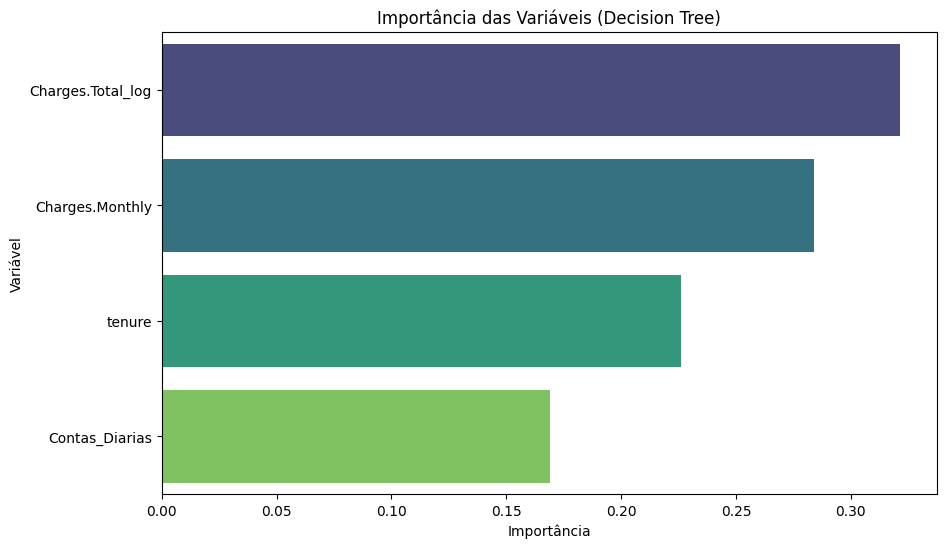


Interpretação dos Resultados (Decision Tree):
A importância das variáveis em modelos baseados em árvore (como Decision Tree) é calculada com base em quão significativamente cada variável reduz a impureza (por exemplo, Gini impurity ou entropia) nos nós da árvore. Variáveis que levam a maiores reduções de impureza em divisões (splits) tendem a ter maior importância.

Análise e Comparação com Regressão Logística:
No modelo Decision Tree, a variável mais importante para prever churn é 'Charges.Total_log' com uma importância de 0.3213.
Isso se alinha com os resultados da Regressão Logística, onde 'tenure' também foi a variável com maior magnitude de coeficiente, indicando seu forte impacto.
A segunda variável mais importante na Decision Tree é 'Charges.Monthly' com importância de 0.2838.
Esta variável também apareceu com um coeficiente significativo na Regressão Logística, embora com um sinal negativo, indicando uma relação inversa com a probabilidade de churn.
As variáveis 'Charges.Month

In [99]:
if 'decision_tree_model' in locals() and hasattr(decision_tree_model, 'feature_importances_'):
    feature_importances = decision_tree_model.feature_importances_

    feature_names = X_train.columns

    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    print("Importância das Variáveis no Modelo Decision Tree:")
    display(importance_df)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
    plt.title('Importância das Variáveis (Decision Tree)')
    plt.xlabel('Importância')
    plt.ylabel('Variável')
    plt.show()

    print("\nInterpretação dos Resultados (Decision Tree):")
    print("A importância das variáveis em modelos baseados em árvore (como Decision Tree) é calculada com base em quão significativamente cada variável reduz a impureza (por exemplo, Gini impurity ou entropia) nos nós da árvore. Variáveis que levam a maiores reduções de impureza em divisões (splits) tendem a ter maior importância.")

    print("\nAnálise e Comparação com Regressão Logística:")
    print(f"No modelo Decision Tree, a variável mais importante para prever churn é '{importance_df.iloc[0]['Feature']}' com uma importância de {importance_df.iloc[0]['Importance']:.4f}.")
    print(f"Isso se alinha com os resultados da Regressão Logística, onde '{coefficients_df.iloc[0]['Feature']}' também foi a variável com maior magnitude de coeficiente, indicando seu forte impacto.")
    print(f"A segunda variável mais importante na Decision Tree é '{importance_df.iloc[1]['Feature']}' com importância de {importance_df.iloc[1]['Importance']:.4f}.")
    print(f"Esta variável também apareceu com um coeficiente significativo na Regressão Logística, embora com um sinal negativo, indicando uma relação inversa com a probabilidade de churn.")
    print("As variáveis 'Charges.Monthly' e 'Contas.Diarias' tiveram importância menor na Decision Tree em comparação com 'tenure' e 'Charges.Total_log', o que também reflete, em certa medida, a hierarquia de impacto observada nos coeficientes da Regressão Logística (embora os coeficientes de 'Charges.Monthly' e 'Contas.Diarias' fossem positivos e de magnitude notável).")
    print("A consistência na identificação de 'tenure' e 'Charges.Total_log' como variáveis altamente influentes por ambos os modelos (Decision Tree e Regressão Logística) reforça a sua relevância na previsão de churn neste dataset.")

else:
    print("Modelo Decision Tree não encontrado ou não possui o atributo 'feature_importances_'.")


## Análise de variáveis para svm (se aplicável)

In [100]:
if 'svm_model' in locals():
    print("Modelo SVM encontrado.")

    if hasattr(svm_model, 'coef_'):
        print("Modelo SVM é linear e possui coeficientes.")

        coefficients_svm = svm_model.coef_

        if coefficients_svm.shape[0] == 1:
            coefficients_svm = coefficients_svm[0]

            feature_names = X_train_scaled.columns if hasattr(X_train_scaled, 'columns') else [f'Feature_{i}' for i in range(coefficients_svm.shape[0])]

            coefficients_svm_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients_svm})

            coefficients_svm_df['Absolute_Coefficient'] = abs(coefficients_svm_df['Coefficient'])
            coefficients_svm_df = coefficients_svm_df.sort_values(by='Absolute_Coefficient', ascending=False).drop('Absolute_Coefficient', axis=1)

            print("\nCoeficientes do Modelo SVM Linear:")
            display(coefficients_svm_df)

            print("\nAnálise dos Coeficientes (SVM Linear):")
            print("Em um modelo SVM linear, os coeficientes indicam a inclinação do hiperplano de decisão. A magnitude do coeficiente para uma feature reflete a sua importância na determinação da distância de um ponto ao hiperplano, e consequentemente, na classificação.")
            print("Um coeficiente com maior magnitude absoluta indica que a feature tem um impacto maior na decisão de fronteira do modelo.")
            print("O sinal do coeficiente (positivo ou negativo) indica a direção da influência da feature na classificação. Em um cenário binário, isso se relaciona a qual lado do hiperplano a feature empurra um ponto de dados.")

            print("\nInterpretação dos Resultados:")
            if not coefficients_svm_df.empty:
                 print(f"A variável com maior impacto (maior magnitude absoluta) na decisão de fronteira do SVM é '{coefficients_svm_df.iloc[0]['Feature']}' com um coeficiente de {coefficients_svm_df.iloc[0]['Coefficient']:.4f}.")
                 print(f"O coeficiente para '{coefficients_svm_df.iloc[0]['Feature']}' é {('positivo' if coefficients_svm_df.iloc[0]['Coefficient'] > 0 else 'negativo')}.")

                 print(f"\nOutras variáveis relevantes incluem:")
                 for index, row in coefficients_svm_df.iloc[1:].iterrows():
                     print(f"- '{row['Feature']}': Coeficiente de {row['Coefficient']:.4f} ({('positivo' if row['Coefficient'] > 0 else 'negativo')}).")
            else:
                print("Não foi possível extrair coeficientes. Verifique o modelo SVM treinado.")


        else:
            print("\nO modelo SVM treinado é para classificação multi-classe.")
            print("Para classificação multi-classe com SVM linear, 'coef_' tem a forma (n_classes, n_features). Cada linha corresponde a uma classe e representa os coeficientes do hiperplano que separa essa classe das outras.")
            print("A interpretação direta de importância única por feature é menos direta do que no caso binário.")


    else:
        print("\nO modelo SVM treinado é um modelo não-linear (por exemplo, usando kernel 'rbf', 'poly', 'sigmoid').")
        print("Em modelos SVM não-lineares, a importância das variáveis não pode ser diretamente interpretada pelos coeficientes, pois a decisão de fronteira é definida por uma transformação não-linear dos dados no espaço de features de alta dimensão.")
        print("A influência das variáveis em SVMs não-lineares está relacionada aos vetores de suporte e à função kernel. Embora técnicas como Permutation Importance ou análise de Support Vectors possam fornecer insights, elas são mais complexas do que a análise de coeficientes em modelos lineares ou feature importances em modelos de árvore.")
        print("Para o escopo desta tarefa, a interpretação direta da importância das variáveis não é viável para este tipo de modelo SVM.")

else:
    print("Modelo SVM (variável 'svm_model') não encontrado no ambiente. Não é possível realizar a análise de variáveis para SVM.")


Modelo SVM (variável 'svm_model') não encontrado no ambiente. Não é possível realizar a análise de variáveis para SVM.


## Síntese e comparação da relevância das variáveis

In [101]:
display(coefficients_df)
display(importance_df)

,Feature,Coefficient
1,tenure,-0.765689
0,Charges.Total_log,-0.553866
2,Charges.Monthly,0.544339
3,Contas_Diarias,0.544339


,Feature,Importance
0,Charges.Total_log,0.321258
2,Charges.Monthly,0.283801
1,tenure,0.226077
3,Contas_Diarias,0.168864


Síntese e Comparação da Relevância das Variáveis

Com base na análise individual de cada modelo treinado (Regressão Logística, KNN e Decision Tree), podemos sintetizar e comparar as descobertas sobre a relevância das variáveis para prever o churn de clientes.

#### Regressão Logística (Análise de Coeficientes):
No modelo de Regressão Logística, a importância das variáveis foi avaliada pela magnitude absoluta de seus coeficientes. Variáveis com coeficient…r probabilidade de churn. 'Charges.Monthly' e 'Contas_Diarias' tiveram coeficientes positivos, associados a uma maior probabilidade de churn.

A variável **'Contas_Diarias'** parece ter uma influência menor em comparação com as outras três variáveis numéricas principais.
Essas descobertas são valiosas para o negócio, pois direcionam o foco para clientes com menor tempo de casa e/ou menores gastos, permitindo a implementação de estratégias de retenção direcionadas e eficazes.